In [3]:
import psycopg2
import pandas as pd

conn = psycopg2.connect(
            host="localhost",      # docker exposes this port to your host
            port=54609,            # <- use this mapped port
            database="mydb",
            user="postgres",
            password="Sunjala@271122"
        )
print("✅ Connection successful")

query = "SELECT * FROM production.product;"
productDetails_df = pd.read_sql(query, conn)
print("✅ Data loaded successfully")
print(productDetails_df.head())

conn.close()

✅ Connection successful
✅ Data loaded successfully
   productid                   name productnumber  makeflag  \
0          1        Adjustable Race       AR-5381     False   
1          2           Bearing Ball       BA-8327     False   
2          3        BB Ball Bearing       BE-2349      True   
3          4  Headset Ball Bearings       BE-2908     False   
4        316                  Blade       BL-2036      True   

   finishedgoodsflag color  safetystocklevel  reorderpoint  standardcost  \
0              False  None              1000           750           0.0   
1              False  None              1000           750           0.0   
2              False  None               800           600           0.0   
3              False  None               800           600           0.0   
4              False  None               800           600           0.0   

   listprice  ... productline class style  productsubcategoryid  \
0        0.0  ...        None  None  None     

C:\Users\binoj\AppData\Local\Temp\ipykernel_18444\4155294913.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  productDetails_df = pd.read_sql(query, conn)


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import numpy as np

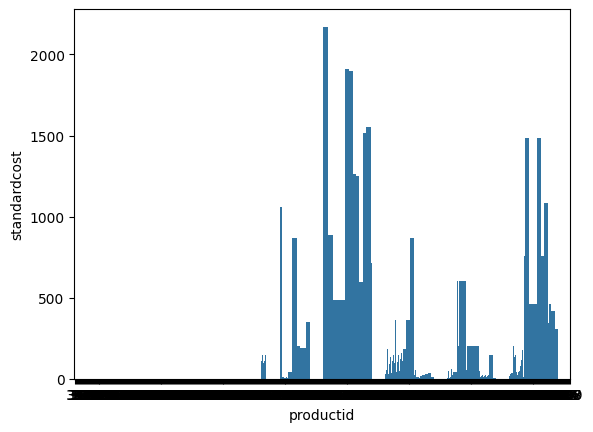

In [7]:
productDetails_df.sort_values(by='standardcost', ascending=False, inplace=True)
sns.barplot(x=productDetails_df['productid'], y=productDetails_df['standardcost'])
plt.show()

In [9]:
SalesTransactions_df = pd.read_csv(r'C:\Binoj - Learnings\Learning\Pro IT Bridge\Python Basics\data\Sales-Transactions-Edited.csv')

In [10]:
SalesTransactions_df

,Date,Voucher,Party,Product,Qty,Rate
0,1/4/2017,1,SOLANKI PLASTICS,DONA-VAI-9100,2,1690.0
1,1/4/2017,1,SOLANKI PLASTICS,LITE FOAM(1200),6,1620.0
2,1/4/2017,2,SARNESWARA TRADERS,VISHNU CHOTA WINE,500,23.0
3,1/4/2017,2,SARNESWARA TRADERS,LITE FOAM(1200),6,1620.0
4,1/4/2017,2,SARNESWARA TRADERS,DONA-VAI-9100,5,1690.0
...,...,...,...,...,...,...
95557,12/9/2019,4265,TP13,SPOON MED M.W,20,11.0
95558,12/9/2019,4266,K.SRIHARI,SMART BOUL(48),1,1830.0
95559,12/9/2019,4267,SMS,SMARTBOUL GLA(4000),1,1520.0
95560,12/9/2019,4268,ANILFANCY,RR WINEGLASS,100,20.0


In [27]:
SalesTransactions_df.shape

(95562, 6)

In [28]:
SalesTransactions_df.head()

,Date,Voucher,Party,Product,Qty,Rate
0,1/4/2017,1,SOLANKI PLASTICS,DONA-VAI-9100,2,1690.0
1,1/4/2017,1,SOLANKI PLASTICS,LITE FOAM(1200),6,1620.0
2,1/4/2017,2,SARNESWARA TRADERS,VISHNU CHOTA WINE,500,23.0
3,1/4/2017,2,SARNESWARA TRADERS,LITE FOAM(1200),6,1620.0
4,1/4/2017,2,SARNESWARA TRADERS,DONA-VAI-9100,5,1690.0


In [40]:
SalesTransactions_df['Product'].value_counts().sort_values(ascending=False)

Product
14 GREEN               2399
VISHNU 300ML           2141
TIRUMALA-50(16*20)     2138
VISHNU 250ML           2066
BLACK DOG-350ML        1993
                       ... 
LD NO-1                   1
SPOON SPIDERMAN COL       1
VENIGAR                   1
RELIANCE GLASS            1
DOME LID(80-DIA)          1
Name: count, Length: 866, dtype: int64

In [41]:
SalesTransactions_df.groupby('Product').size().sort_values(ascending=False)

Product
14 GREEN              2399
VISHNU 300ML          2141
TIRUMALA-50(16*20)    2138
VISHNU 250ML          2066
BLACK DOG-350ML       1993
                      ... 
TIRUMALA PLATES-9        1
VENIGAR                  1
10" GREEN                1
10" SILVER HEAVY         1
1.25 COOLDRINKS          1
Length: 866, dtype: int64

In [29]:
SalesTransactions_df.sample(5)

,Date,Voucher,Party,Product,Qty,Rate
60330,9/29/2018,4977,GANESHMESS,CHEF CAP,40,65.0
34169,1/29/2018,8494,SEKHAR MARKET,GANESH 16*20,100,38.0
20081,9/6/2017,2279,LAKSHMIFANCY,10*15 STAR-DCUT,20,90.0
7180,5/12/2017,7197,DR UTTAM HOTEL-NELL,PRINT 13*16 CARRY,2,120.0
26721,11/13/2017,6570,MGS,NO-2,10,142.0


In [30]:
SalesTransactions_df.columns.tolist()

['Date', 'Voucher', 'Party', 'Product', 'Qty', 'Rate']

In [32]:
SalesTransactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95562 entries, 0 to 95561
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     95562 non-null  object 
 1   Voucher  95562 non-null  int64  
 2   Party    95562 non-null  object 
 3   Product  95562 non-null  object 
 4   Qty      95562 non-null  int64  
 5   Rate     95561 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.4+ MB


In [33]:
SalesTransactions_df.describe(include='all')

,Date,Voucher,Party,Product,Qty,Rate
count,95562,95562.000000,95562,95562,95562.000000,95561.000000
unique,835,NaN,712,866,NaN,NaN
top,5/17/2017,NaN,TP13,14 GREEN,NaN,NaN
freq,282,NaN,13056,2399,NaN,NaN
mean,NaN,4469.104006,NaN,NaN,182.157657,249.612310
std,NaN,2810.486250,NaN,NaN,725.256966,2013.475202
min,NaN,1.000000,NaN,NaN,0.000000,0.010000
25%,NaN,2047.000000,NaN,NaN,10.000000,16.000000
50%,NaN,4186.500000,NaN,NaN,50.000000,28.000000
75%,NaN,6854.000000,NaN,NaN,150.000000,140.000000


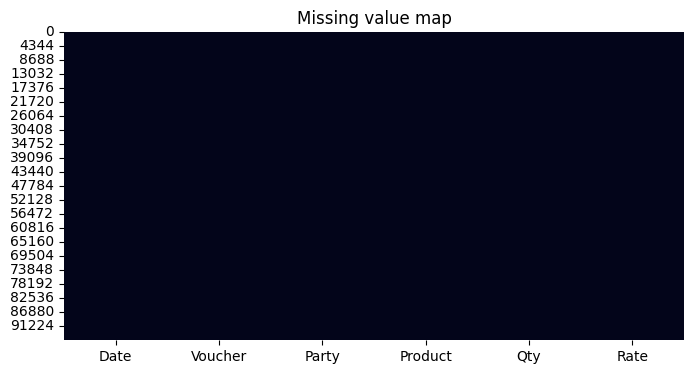

In [34]:
plt.figure(figsize=(8,4))
sns.heatmap(SalesTransactions_df.isnull(), cbar=False)
plt.title("Missing value map")
plt.show()

In [42]:
productDetails_df.describe(include='all')



,productid,name,productnumber,makeflag,finishedgoodsflag,color,safetystocklevel,reorderpoint,standardcost,listprice,...,productline,class,style,productsubcategoryid,productmodelid,sellstartdate,sellenddate,discontinueddate,rowguid,modifieddate
count,504.000000,504,504,504,504,256,504.000000,504.000000,504.000000,504.000000,...,278,247,211,295.000000,295.000000,504,98,0,504,504
unique,NaN,504,504,2,2,9,NaN,NaN,NaN,NaN,...,4,3,3,NaN,NaN,NaN,NaN,0,504,NaN
top,NaN,"Road-150 Red, 44",BK-R93R-44,False,True,Black,NaN,NaN,NaN,NaN,...,R,L,U,NaN,NaN,NaN,NaN,NaN,c19e1136-5da4-4b40-8758-54a85d7ea494,NaN
freq,NaN,1,1,265,295,93,NaN,NaN,NaN,NaN,...,100,97,176,NaN,NaN,NaN,NaN,NaN,1,NaN
mean,673.039683,NaN,NaN,NaN,NaN,NaN,535.150794,401.363095,258.602961,438.666250,...,NaN,NaN,NaN,12.294915,37.444068,2010-10-30 03:22:51.428571392,2013-02-09 23:45:18.367346944,NaN,NaN,2014-02-08 10:01:37.102164736
min,1.000000,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,0.000000,0.000000,...,NaN,NaN,NaN,1.000000,1.000000,2008-04-30 00:00:00,2012-05-29 00:00:00,NaN,NaN,2014-02-08 10:01:36.827000
25%,447.750000,NaN,NaN,NaN,NaN,NaN,100.000000,75.000000,0.000000,0.000000,...,NaN,NaN,NaN,2.000000,11.000000,2008-04-30 00:00:00,2012-05-29 00:00:00,NaN,NaN,2014-02-08 10:01:36.827000064
50%,747.500000,NaN,NaN,NaN,NaN,NaN,500.000000,375.000000,23.372200,49.990000,...,NaN,NaN,NaN,12.000000,26.000000,2011-05-31 00:00:00,2013-05-29 00:00:00,NaN,NaN,2014-02-08 10:01:36.827000064
75%,873.250000,NaN,NaN,NaN,NaN,NaN,1000.000000,750.000000,317.075825,564.990000,...,NaN,NaN,NaN,17.000000,48.500000,2013-05-30 00:00:00,2013-05-29 00:00:00,NaN,NaN,2014-02-08 10:01:36.827000064
max,999.000000,NaN,NaN,NaN,NaN,NaN,1000.000000,750.000000,2171.294200,3578.270000,...,NaN,NaN,NaN,37.000000,128.000000,2013-05-30 00:00:00,2013-05-29 00:00:00,NaN,NaN,2014-02-08 10:03:55.510000


In [43]:
productDetails_df.head()

,productid,name,productnumber,makeflag,finishedgoodsflag,color,safetystocklevel,reorderpoint,standardcost,listprice,...,productline,class,style,productsubcategoryid,productmodelid,sellstartdate,sellenddate,discontinueddate,rowguid,modifieddate
254,750,"Road-150 Red, 44",BK-R93R-44,True,True,Red,100,75,2171.2942,3578.27,...,R,H,U,2.0,25.0,2011-05-31,2012-05-29,None,c19e1136-5da4-4b40-8758-54a85d7ea494,2014-02-08 10:01:36.827
256,752,"Road-150 Red, 52",BK-R93R-52,True,True,Red,100,75,2171.2942,3578.27,...,R,H,U,2.0,25.0,2011-05-31,2012-05-29,None,5e085ba0-3cd5-487f-85bb-79ed1c701f23,2014-02-08 10:01:36.827
253,749,"Road-150 Red, 62",BK-R93R-62,True,True,Red,100,75,2171.2942,3578.27,...,R,H,U,2.0,25.0,2011-05-31,2012-05-29,None,bc621e1f-2553-4fdc-b22e-5e44a9003569,2014-02-08 10:01:36.827
255,751,"Road-150 Red, 48",BK-R93R-48,True,True,Red,100,75,2171.2942,3578.27,...,R,H,U,2.0,25.0,2011-05-31,2012-05-29,None,d10b7cc1-455e-435b-a08f-ec5b1c5776e9,2014-02-08 10:01:36.827
257,753,"Road-150 Red, 56",BK-R93R-56,True,True,Red,100,75,2171.2942,3578.27,...,R,H,U,2.0,25.0,2011-05-31,2012-05-29,None,30819b88-f0d3-4e7a-8105-19f6fac2cefb,2014-02-08 10:01:36.827


In [45]:
productDetails_df.shape

(504, 25)

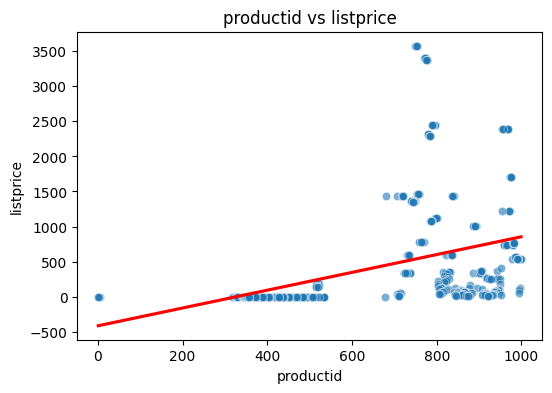

In [48]:
# scatter + regression
x, y = 'productid', 'listprice'
plt.figure(figsize=(6,4))
sns.scatterplot(data=productDetails_df, x=x, y=y, alpha=0.6)
sns.regplot(data=productDetails_df, x=x, y=y, scatter=False, ci=None, line_kws={'color':'red'})
plt.title(f"{x} vs {y}")
plt.show()

In [49]:
productDetails_df.isna().sum()

productid                  0
name                       0
productnumber              0
makeflag                   0
finishedgoodsflag          0
color                    248
safetystocklevel           0
reorderpoint               0
standardcost               0
listprice                  0
size                     293
sizeunitmeasurecode      328
weightunitmeasurecode    299
weight                   299
daystomanufacture          0
productline              226
class                    257
style                    293
productsubcategoryid     209
productmodelid           209
sellstartdate              0
sellenddate              406
discontinueddate         504
rowguid                    0
modifieddate               0
dtype: int64

In [50]:
productDetails_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 254 to 0
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   productid              504 non-null    int64         
 1   name                   504 non-null    object        
 2   productnumber          504 non-null    object        
 3   makeflag               504 non-null    bool          
 4   finishedgoodsflag      504 non-null    bool          
 5   color                  256 non-null    object        
 6   safetystocklevel       504 non-null    int64         
 7   reorderpoint           504 non-null    int64         
 8   standardcost           504 non-null    float64       
 9   listprice              504 non-null    float64       
 10  size                   211 non-null    object        
 11  sizeunitmeasurecode    176 non-null    object        
 12  weightunitmeasurecode  205 non-null    object        
 13  weight    